In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('model_data.csv').drop(columns = ['Unnamed: 0'])

In [2]:
df.columns

Index(['id', 'user_id', 'shift_id', 'prev_CW/SA_rate', 'status',
       'S_create2SA_Create', 'S_Create2Start_Time', 'SA_Create2Start_Time',
       'U_create2now', 'U_approve2now', 'prev_CW x SA_rate', 'type_RN',
       'type_LVN+LPN', 'segmentName_d', 'areaName_houston', 'areaName_no',
       'areaName_dfw', 'areaName_austin', 'areaName_san', 'net_pay',
       'distance', 'target', 'createdAt', 'Start_Time'],
      dtype='object')

# Data Prepration

In [3]:
# standardlize, dont standardlize dummy! 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop(['id', 'user_id', 'shift_id', 'target', 'createdAt', 'Start_Time', 'type_RN', 
                    'type_LVN+LPN', 'segmentName_d', 'areaName_houston', 'areaName_no', 'areaName_dfw', 
                    'areaName_austin', 'areaName_san','status','distance'], axis=1))
scaled_features = scaler.transform(df.drop(['id', 'user_id', 'shift_id', 'target', 'createdAt',
                                            'Start_Time', 'type_RN', 'type_LVN+LPN', 'segmentName_d', 
                                            'areaName_houston', 'areaName_no', 'areaName_dfw', 
                                            'areaName_austin', 'areaName_san','status','distance'], axis=1))

# scaled features
X = pd.DataFrame(scaled_features, columns = ['prev_CW/SA_rate', 'prev_CW x SA_rate', 'S_create2SA_Create', 
                                             'S_Create2Start_Time', 'SA_Create2Start_Time', 'U_create2now', 
                                             'U_approve2now', 'net_pay'])
# concat with dummy
df = pd.concat([df[['id', 'user_id', 'shift_id', 'target', 'createdAt',
                    'Start_Time', 'type_RN', 'type_LVN+LPN', 'segmentName_d', 
                    'areaName_houston', 'areaName_no', 'areaName_dfw', 
                    'areaName_austin', 'areaName_san','status']], X], axis = 1)

# drop nas
df.dropna(inplace = True)

### set future data point as realdata

### note !!!: real data might overlap with train test validation data

In [4]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
realdata = df[df['Start_Time'].apply(lambda x: x >= pd.to_datetime('2021-3-22') and x < pd.to_datetime('2021-3-28'))]
realdata = df[df['status']=='Confirm']

In [5]:
df.columns

Index(['id', 'user_id', 'shift_id', 'target', 'createdAt', 'Start_Time',
       'type_RN', 'type_LVN+LPN', 'segmentName_d', 'areaName_houston',
       'areaName_no', 'areaName_dfw', 'areaName_austin', 'areaName_san',
       'status', 'prev_CW/SA_rate', 'prev_CW x SA_rate', 'S_create2SA_Create',
       'S_Create2Start_Time', 'SA_Create2Start_Time', 'U_create2now',
       'U_approve2now', 'net_pay'],
      dtype='object')

###  <font color = green> Validation set: 1000 recently records

In [6]:
# slice
validation = df[-1000:]

y_valid = validation['target']
x_valid = validation.drop(['id','user_id', 'shift_id', 'createdAt', 'Start_Time', 'target','status'], axis = 1)

y_valid.value_counts()

0    958
1     42
Name: target, dtype: int64

In [7]:
x_valid

,type_RN,type_LVN+LPN,segmentName_d,areaName_houston,areaName_no,areaName_dfw,areaName_austin,areaName_san,prev_CW/SA_rate,prev_CW x SA_rate,S_create2SA_Create,S_Create2Start_Time,SA_Create2Start_Time,U_create2now,U_approve2now,net_pay
66874,0,0,1,0,0,0,1,0,0.965178,-0.163726,-0.549180,-0.593025,-1.516786,-1.511942,-0.280175,-0.398798
66875,0,0,1,0,0,0,1,0,0.926233,-0.163726,-0.443731,-0.451757,-1.516786,-1.511942,-0.278019,-0.398798
66876,0,0,1,0,0,0,1,0,0.889235,-0.163738,-0.338286,-0.310485,-1.516786,-1.511942,-0.275863,-0.398798
66877,0,0,1,0,0,0,0,1,-0.300547,-0.323837,-0.693878,-0.646564,-1.499899,-1.483471,-0.307488,-0.560612
66878,0,0,1,0,0,0,0,1,-0.303834,-0.323837,-0.693878,-0.646564,-1.499899,-1.483471,-0.306769,-0.560612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67869,0,0,1,0,0,1,0,0,0.871421,-0.268060,-0.747231,-0.766922,-1.477153,-1.774852,-0.323300,-0.398798
67870,0,1,1,1,0,0,0,0,-0.386396,-0.550007,0.701160,1.420540,-1.298714,-1.261063,-0.279456,0.949649
67871,0,1,1,1,0,0,0,0,-0.389256,-0.549824,0.595708,1.279107,-1.298714,-1.261063,-0.278019,0.949649
67872,0,1,1,1,0,0,0,0,-0.390649,-0.549673,0.490258,1.137706,-1.298714,-1.261063,-0.277300,0.949649


### Train test: main dataset - validation set

In [8]:
df = df[:-1000] # slice 

In [9]:
# make a dataset that num of tar = num of non tar, use it for train test
import random
df_tar = df[df['target']==1].reset_index(drop = True)
df_nontar = df[df['target']==0].reset_index(drop = True)

number_of_tar = df_tar.shape[0]
random_indices = random.sample(range(len(df_nontar)), int(number_of_tar))
df_nontar = df_nontar[df_nontar.index.isin(random_indices)]

# concat
df = pd.concat([df_tar, df_nontar]).reset_index(drop = True)

In [17]:
X = np.array(df.drop(['id','user_id', 'shift_id', 'target', 'createdAt', 'Start_Time','status'], axis = 1))
y = np.array(df['target'])

# set test, train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## neural network

In [19]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

Epoch: 1000, Loss: 0.4685974419116974, Accuracy: 76.87232208251953%
Epoch: 2000, Loss: 0.45176202058792114, Accuracy: 77.43318939208984%
Epoch: 3000, Loss: 0.431262344121933, Accuracy: 79.26426696777344%
Epoch: 4000, Loss: 0.4096651077270508, Accuracy: 80.3365249633789%
Epoch: 5000, Loss: 0.4039430618286133, Accuracy: 80.6004638671875%
Epoch: 6000, Loss: 0.38139307498931885, Accuracy: 82.18409729003906%
Epoch: 7000, Loss: 0.3972679376602173, Accuracy: 80.91388702392578%
Epoch: 8000, Loss: 0.3682937026023865, Accuracy: 83.1078872680664%
Epoch: 9000, Loss: 0.3830803334712982, Accuracy: 81.24381256103516%
Epoch: 10000, Loss: 0.3888908922672272, Accuracy: 81.39228057861328%


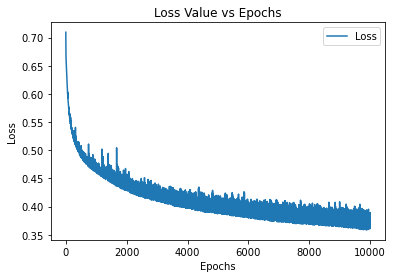

In [20]:
class LogisticRegression(nn.Module):
    def __init__(self, init_in_features):
        super(LogisticRegression, self).__init__()
        self.linear1 = nn.Linear(init_in_features, 100)
        self.linear2 = nn.Linear(100, 10)
        self.linear3 = nn.Linear(10, 2)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
model = LogisticRegression(init_in_features = x_train.shape[1])

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters() , lr=0.01)

#.detach().numpy() 
#if you need to run this again
x_train = Variable(torch.from_numpy(x_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()

epochs = 10000
model.train()
loss_values = []
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss_values.append(loss.item())
    pred = torch.max(y_pred, 1)[1].eq(y_train).sum()
    acc = pred * 100.0 / len(x_train)
    if (epoch+1)%1000 ==0:
        print('Epoch: {}, Loss: {}, Accuracy: {}%'.format(epoch+1, loss.item(), acc.numpy()))
    loss.backward()
    optimizer.step()

plt.plot(loss_values)
plt.title('Loss Value vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss'])
plt.show()

x_test = Variable(torch.from_numpy(x_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()

model.eval()
with torch.no_grad():
    y_pred = model(x_test)
    loss = criterion(y_pred, y_test)
    pred = torch.max(y_pred, 1)[1].eq(y_test).sum()
    accuracy_nn = float(pred/len(x_test))
    

## Validation

In [16]:
from sklearn.metrics import (auc, classification_report, roc_auc_score, accuracy_score,roc_curve)
from sklearn.metrics import confusion_matrix
x_valid = np.array(x_valid)
x_valid = Variable(torch.from_numpy(x_valid)).float()
predictions = model(x_valid)
pred = torch.max(predictions, 1)[1]

print(confusion_matrix(y_valid,pred))
print('\n')
print(classification_report(y_valid,pred))

[[640 318]
 [ 17  25]]


              precision    recall  f1-score   support

           0       0.97      0.67      0.79       958
           1       0.07      0.60      0.13        42

    accuracy                           0.67      1000
   macro avg       0.52      0.63      0.46      1000
weighted avg       0.94      0.67      0.76      1000

